In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn tensorflow keras torch nltk joblib pydot torchviz torchinfo xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 34.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 88.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import seaborn as sns
import joblib

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.metrics import f1_score, precision_recall_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.utils import resample
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras import Sequential
from tensorflow.keras.utils import plot_model, to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/balanced_dataset_3.csv')
df.head(10)

,url,url_len,hostname_len,entropy,nb_dots,nb_hyphens,nb_exclamation,nb_and,nb_equal,nb_underscore,...,percent_ex_media,percent_safe_anchor,percent_in_links,whois_reg_domain,domain_reg_len,domain_age,dns_record,google_index,page_rank,label
0,http://www.schoolvoorontwikkeling.nl/wie-zijn-...,71,29,-4.300223,2,4,0,0,0,0,...,0.0,0.0,0.0,1,0,-2,1,-1,0,defacement
1,http://www.stuckateur-fickinger.de/ueber-uns.html,49,27,-4.303713,3,2,0,0,0,0,...,0.0,0.0,0.0,1,-1,-1,1,-1,0,defacement
2,http://162.212.113.198:39844/Mozi.m,35,15,-3.954443,4,0,0,0,0,0,...,0.0,0.0,0.0,1,0,-2,1,-1,0,malware
3,https://fluokids.blogspot.com/2011/11/so-close...,63,21,-4.347991,3,3,0,0,0,0,...,100.0,0.0,0.0,0,383,9112,0,-1,5,benign
4,https://minorleagueball.com/2008/10/15/635257/...,71,19,-4.645932,1,4,0,0,0,0,...,0.0,0.0,0.0,0,203,7466,0,-1,4,benign
5,https://www.engr.du.edu/profile/marvin.htm,42,15,-4.225185,4,0,0,0,0,0,...,0.0,0.0,0.0,0,744,13656,0,-1,5,phishing
6,https://harvestbible.org/,25,16,-3.863465,1,0,0,0,0,0,...,0.0,0.0,0.0,0,227,10365,0,-1,4,benign
7,http://www.tandemw.kz/index.php?view=article&c...,161,14,-4.812936,3,10,1,7,8,1,...,0.0,0.0,0.0,1,-1,-1,1,-1,0,defacement
8,https://lightsense.top/download/fortnite,40,14,-3.927567,1,0,0,0,0,0,...,0.0,0.0,0.0,0,321,43,1,-1,0,malware
9,http://42.232.115.222:44518/Mozi.m,34,14,-3.799979,4,0,0,0,0,0,...,0.0,0.0,0.0,1,0,-2,1,-1,0,malware


In [ ]:
# Preprocess labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(df['label'])
labels_one_hot = tf.keras.utils.to_categorical(labels_encoded)
label_names = label_encoder.classes_

In [ ]:
X1 = df.drop(columns=['label', 'url'])
X1.shape

(385259, 71)

In [ ]:
# MinMaxScaler except for these columns
columns_to_scale = [col for col in X1.columns if col not in ['domain_reg_len', 'domain_age', 'page_rank', 'google_index']]
scaler = MinMaxScaler(feature_range=(0, 1))
X1[columns_to_scale] = scaler.fit_transform(X1[columns_to_scale])
joblib.dump(scaler, 'scaler.pkl') #Download for predict
X1.head(10)

,url_len,hostname_len,entropy,nb_dots,nb_hyphens,nb_exclamation,nb_and,nb_equal,nb_underscore,nb_tilde,...,percent_in_media,percent_ex_media,percent_safe_anchor,percent_in_links,whois_reg_domain,domain_reg_len,domain_age,dns_record,google_index,page_rank
0,0.034483,0.115385,0.489519,0.047619,0.045977,0.00,0.00,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,1.0,0,-2,1.0,-1,0
1,0.022046,0.106838,0.488519,0.071429,0.022989,0.00,0.00,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,1.0,-1,-1,1.0,-1,0
2,0.014132,0.055556,0.588632,0.095238,0.000000,0.00,0.00,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,1.0,0,-2,1.0,-1,0
3,0.029960,0.081197,0.475827,0.071429,0.034483,0.00,0.00,0.000000,0.000000,0.0,...,0.0,1.0,0.0,0.0,0.0,383,9112,0.0,-1,5
4,0.034483,0.072650,0.390426,0.023810,0.045977,0.00,0.00,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,203,7466,0.0,-1,4
5,0.018089,0.055556,0.511028,0.095238,0.000000,0.00,0.00,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,744,13656,0.0,-1,5
6,0.008479,0.059829,0.614710,0.023810,0.000000,0.00,0.00,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,227,10365,0.0,-1,4
7,0.085359,0.051282,0.342557,0.071429,0.114943,0.05,0.14,0.156863,0.015625,0.0,...,0.0,0.0,0.0,0.0,1.0,-1,-1,1.0,-1,0
8,0.016959,0.051282,0.596336,0.023810,0.000000,0.00,0.00,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,321,43,1.0,-1,0
9,0.013567,0.051282,0.632907,0.095238,0.000000,0.00,0.00,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,1.0,0,-2,1.0,-1,0


In [ ]:
Y1 = pd.DataFrame(labels_one_hot, columns=label_encoder.classes_)
Y1.to_csv('/content/drive/MyDrive/Colab Notebooks/labels_one_hot.csv', index=False)
Y1.shape

(385259, 4)

In [ ]:
X2 = df['url']
X2.head(2)

,url
0,http://www.schoolvoorontwikkeling.nl/wie-zijn-...
1,http://www.stuckateur-fickinger.de/ueber-uns.html


# CREATE DATASET WITH PRIOR FEATURES EXTRACTION

In [ ]:
X_train1,X_test1,Y_train1,Y_test1 = train_test_split(X1,Y1,stratify = Y1,test_size = 0.2,random_state = 42)

In [ ]:
X_train1 = np.expand_dims(X_train1, axis=-1)
X_test1 = np.expand_dims(X_test1, axis=-1)

print(X_train1.shape, Y_train1.shape)

(308207, 71, 1) (308207, 4)


In [ ]:
input_size1 = X_train1[1].shape

# CREATE DATASET WITHOUT PRIOR FEATURES EXTRACTION

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
ps = PorterStemmer()
corpus_train = []

def albumentations(X, corpus_t):
    for i in range(len(X)):
        print(i, "/", len(X))
        review = X[i].decode('utf-8') if isinstance(X[i], bytes) else X[i]
        review = re.sub(r'\?.*', '', review)  # Bỏ query parameters
        review = re.sub(r'[^a-zA-Z0-9\-\/.]', ' ', review)
        review = review.lower()
        review = review.split()
        review = [ps.stem(word) for word in review if word not in set(stopwords.words("english"))]
        review = " ".join(review)
        corpus_t.append(review)

albumentations(X2, corpus_train)

Streaming output truncated to the last 5000 lines.
380259 / 385259
380260 / 385259
380261 / 385259
380262 / 385259
380263 / 385259
380264 / 385259
380265 / 385259
380266 / 385259
380267 / 385259
380268 / 385259
380269 / 385259
380270 / 385259
380271 / 385259
380272 / 385259
380273 / 385259
380274 / 385259
380275 / 385259
380276 / 385259
380277 / 385259
380278 / 385259
380279 / 385259
380280 / 385259
380281 / 385259
380282 / 385259
380283 / 385259
380284 / 385259
380285 / 385259
380286 / 385259
380287 / 385259
380288 / 385259
380289 / 385259
380290 / 385259
380291 / 385259
380292 / 385259
380293 / 385259
380294 / 385259
380295 / 385259
380296 / 385259
380297 / 385259
380298 / 385259
380299 / 385259
380300 / 385259
380301 / 385259
380302 / 385259
380303 / 385259
380304 / 385259
380305 / 385259
380306 / 385259
380307 / 385259
380308 / 385259
380309 / 385259
380310 / 385259
380311 / 385259
380312 / 385259
380313 / 385259
380314 / 385259
380315 / 385259
380316 / 385259
380317 / 385259
38031

In [ ]:
corpus_train[:4]

['http //www.schoolvoorontwikkeling.nl/wie-zijn-we/mensen/126-john-serkei',
 'http //www.stuckateur-fickinger.de/ueber-uns.html',
 'http //162.212.113.198 39844/mozi.m',
 'http //fluokids.blogspot.com/2011/11/so-close-to-paradise.html']

In [ ]:
cv = TfidfVectorizer(max_features=300)
X2 = cv.fit_transform(corpus_train)
joblib.dump(cv, "tfidf_vectorizer.pkl") # Download for predict

['tfidf_vectorizer.pkl']

In [ ]:
X_train2,X_test2,Y_train2,Y_test2 = train_test_split(X2,Y1,stratify = Y1,test_size = 0.2,random_state = 42)

In [ ]:
X_train2, Y_train2 = resample(X_train2, Y_train2, n_samples=150000, random_state=42, stratify=Y_train2)

In [ ]:
X_train2 = np.expand_dims(X_train2.toarray(), axis=-1)  # Shape: (308208, 500, 1)
X_test2 = np.expand_dims(X_test2.toarray(), axis=-1)    # Shape: (77052, 500, 1)
print(X_train2.shape,Y_train2.shape)
print(X_test2.shape,Y_test2.shape)

(150000, 300, 1) (150000, 4)
(77052, 300, 1) (77052, 4)


In [ ]:
# train_dataset = tf.data.Dataset.from_tensor_slices((X_train2, Y_train2))
# train_dataset = train_dataset.shuffle(buffer_size=1024).batch(128).prefetch(tf.data.AUTOTUNE)

# val_size = int(0.2 * X_train2.shape[0])
# val_dataset = tf.data.Dataset.from_tensor_slices((X_train2[-val_size:], Y_train2[-val_size:]))
# val_dataset = val_dataset.batch(128).prefetch(tf.data.AUTOTUNE)

In [ ]:
# for x_batch, y_batch in train_dataset.take(1):
#     print(x_batch.shape)
#     print(y_batch.shape)

In [ ]:
input_size2 = X_train2[2].shape
input_size1,input_size2

((71, 1), (300, 1))

# CREATE DATASET FOR XGB (NUMERICAL)

In [ ]:
X3 = df.drop(columns=['label', 'url'])
Y3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/labels_one_hot.csv')
Y3 = np.argmax(Y3.values, axis=1)
X_train3,X_test3,Y_train3,Y_test3 = train_test_split(X3,Y3,stratify = Y3,test_size = 0.2,random_state = 42)
print(X_train3.shape,Y_train3.shape)
print(X_test3.shape,Y_test3.shape)

(308207, 71) (308207,)
(77052, 71) (77052,)


# CREATE DATASET FOR XGB (NON-NUMERICAL)

In [ ]:
X4 = df['url']

In [ ]:
nltk.download('stopwords')
ps = PorterStemmer()
stopwords = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
corpus_train = []
def albumentations(X, corpus_t):
    for i in range(len(X)):
        print(i, "/", len(X))
        review = X[i].decode('utf-8') if isinstance(X[i], bytes) else str(X[i])  # Ensure string handling
        review = re.sub(r'\?.*', '', review)  # Remove query parameters
        review = re.sub(r'[^a-zA-Z0-9\-\/.]', ' ', review)  # Keep -, /, .
        review = review.lower()
        review = review.split()
        review = [ps.stem(word) for word in review if word not in stopwords and len(word) > 2]  # Use stopwords_set
        review = " ".join(review)
        corpus_t.append(review)

albumentations(X4, corpus_train)

Streaming output truncated to the last 5000 lines.
380259 / 385259
380260 / 385259
380261 / 385259
380262 / 385259
380263 / 385259
380264 / 385259
380265 / 385259
380266 / 385259
380267 / 385259
380268 / 385259
380269 / 385259
380270 / 385259
380271 / 385259
380272 / 385259
380273 / 385259
380274 / 385259
380275 / 385259
380276 / 385259
380277 / 385259
380278 / 385259
380279 / 385259
380280 / 385259
380281 / 385259
380282 / 385259
380283 / 385259
380284 / 385259
380285 / 385259
380286 / 385259
380287 / 385259
380288 / 385259
380289 / 385259
380290 / 385259
380291 / 385259
380292 / 385259
380293 / 385259
380294 / 385259
380295 / 385259
380296 / 385259
380297 / 385259
380298 / 385259
380299 / 385259
380300 / 385259
380301 / 385259
380302 / 385259
380303 / 385259
380304 / 385259
380305 / 385259
380306 / 385259
380307 / 385259
380308 / 385259
380309 / 385259
380310 / 385259
380311 / 385259
380312 / 385259
380313 / 385259
380314 / 385259
380315 / 385259
380316 / 385259
380317 / 385259
38031

In [ ]:
cv = TfidfVectorizer(max_features=1000, ngram_range=(1, 2))
X4 = cv.fit_transform(corpus_train)
joblib.dump(cv, "tfidf_vectorizer_XGB.pkl")

['tfidf_vectorizer_XGB.pkl']

In [ ]:
X_train4, X_test4, Y_train4, Y_test4 = train_test_split(X4, Y3, stratify=Y3, test_size=0.2, random_state=42)
print(X_train4.shape, Y_train4.shape)
print(X_test4.shape, Y_test4.shape)

(308207, 1000) (308207,)
(77052, 1000) (77052,)


# EVALUATION HELPER FUNCTIONS

In [ ]:
def eval_graph_CNN(results):
    plt.figure(figsize=(14, 7))
    plt.plot(results.history['accuracy'], 'r', label="Training Accuracy")
    plt.plot(results.history['val_accuracy'], 'b', label="Validation Accuracy")
    plt.legend(loc='upper left')
    plt.title("ACCURACY GRAPH")
    plt.show()
    plt.figure(figsize=(14, 7))
    plt.plot(results.history['loss'], 'r', label="Training Loss")
    plt.plot(results.history['val_loss'], 'b', label="Validation Loss")
    plt.legend(loc='upper left')
    plt.title("LOSS GRAPH")
    plt.show()

In [ ]:
def conf_matrix_multi_label_CNN(X_test, Y_test, model, label_names):
    Y_pred = np.argmax(model.predict(X_test), axis=1)
    Y_test_labels = np.argmax(Y_test, axis=1)
    cm = confusion_matrix(Y_test_labels, Y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names)
    disp.plot(cmap=plt.cm.YlGn)
    plt.title('CONFUSION MATRIX')
    plt.show()
    f1 = f1_score(Y_test_labels, Y_pred, average='macro')
    print(f"Macro F1-Score: {f1:.4f}")

In [ ]:
def pr_auc_multi_label(X_test, Y_test, model, label_names):
    # Đảm bảo X_test và Y_test là mảng NumPy
    X_test = np.array(X_test)
    Y_test = np.array(Y_test)
    print("Shape of X_test inside pr_auc_multi_label:", X_test.shape)
    if len(X_test.shape) == 2:
        X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

    print("Shape of X_test before model.predict:", X_test.shape) # Added print statement
    print("Model expected input shape:", model.input_shape) # Added print statement

    Y_pred_proba = model.predict(X_test)
    Y_test_binary = (Y_test > 0.5).astype(int)

    n_classes = Y_test.shape[1]
    plt.figure(figsize=(14, 7))
    for i in range(n_classes):
        precision, recall, _ = precision_recall_curve(Y_test_binary[:, i], Y_pred_proba[:, i])
        pr_auc = auc(recall, precision)
        plt.plot(recall, precision, label=f'{label_names[i]} (PR-AUC = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('PRECISION-RECALL CURVES FOR MULTI-LABEL CLASSIFICATION')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()
    pr_aucs = [auc(precision_recall_curve(Y_test_binary[:, i], Y_pred_proba[:, i])[1],
                   precision_recall_curve(Y_test_binary[:, i], Y_pred_proba[:, i])[0]) for i in range(n_classes)]
    macro_pr_auc = np.mean(pr_aucs)
    print(f"Macro PR-AUC: {macro_pr_auc:.4f}")

In [ ]:
def conf_matrix_multi_label_XGB(X_test, y_test, model, label_names):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names)
    disp.plot(cmap=plt.cm.YlGn)
    plt.title('CONFUSION MATRIX (XGBoost)')
    plt.show()
    f1 = f1_score(y_test, y_pred, average='macro')
    print(f"Macro F1-Score: {f1:.4f}")

In [ ]:
def eval_graph_XGB(results):
    epochs = range(len(results['validation_0']['mlogloss']))
    plt.figure(figsize=(14, 7))
    plt.plot(epochs, [1 - x for x in results['validation_0']['merror']], 'b', label="Validation Accuracy (1 - Error)")
    plt.legend(loc='upper left')
    plt.title("ACCURACY GRAPH (XGBoost)")
    plt.xlabel("Iteration")
    plt.ylabel("Accuracy")
    plt.show()
    plt.figure(figsize=(14, 7))
    plt.plot(epochs, results['validation_0']['mlogloss'], 'b', label="Validation Loss (Log Loss)")
    plt.legend(loc='upper left')
    plt.title("LOSS GRAPH (XGBoost)")
    plt.xlabel("Iteration")
    plt.ylabel("Log Loss")
    plt.show()

In [ ]:
def conf_matrix_multi_label_RF(X_test, y_test, model, label_names):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names)
    disp.plot(cmap=plt.cm.YlGn)
    plt.title('CONFUSION MATRIX (Random Forest)')
    plt.show()
    f1 = f1_score(y_test, y_pred, average='macro')
    print(f"Macro F1-Score: {f1:.4f}")

In [ ]:
def pr_auc_multi_class_RF(X_test, y_test, model, label_names):
    y_pred_proba = model.predict_proba(X_test)  # Shape: (n_samples, n_classes)
    y_test_one_hot = np.eye(len(label_names))[y_test]  # Chuyển y_test sang one-hot
    n_classes = len(label_names)
    plt.figure(figsize=(14, 7))
    pr_aucs = []
    for i in range(n_classes):
        precision, recall, _ = precision_recall_curve(y_test_one_hot[:, i], y_pred_proba[:, i])
        pr_auc = auc(recall, precision)
        pr_aucs.append(pr_auc)
        plt.plot(recall, precision, label=f'{label_names[i]} (PR-AUC = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('PRECISION-RECALL CURVES FOR MULTI-CLASS CLASSIFICATION (Random Forest)')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()
    macro_pr_auc = np.mean(pr_aucs)
    print(f"Macro PR-AUC: {macro_pr_auc:.4f}")

# CNN MODEL(Multi-Labels)

In [ ]:


def CNN1(input_size, num_classes=4):
    model = keras.Sequential()
    model.add(layers.Input(input_size))
    model.add(layers.Conv1D(filters=32, kernel_size=3, activation='relu', padding='same'))
    model.add(layers.Dropout(0.3))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size=2, padding='same'))
    model.add(layers.Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'))
    model.add(layers.Dropout(0.3))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv1D(filters=128, kernel_size=3, activation='relu', padding='same'))
    model.add(layers.Dropout(0.3))
    model.add(layers.BatchNormalization())
    model.add(layers.Flatten())
    model.add(layers.Dense(64 if input_size[0] <= 100 else 128, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

def CNN2(input_size, num_classes=4):
    model = keras.Sequential()
    model.add(layers.Input(input_size))
    model.add(layers.Conv1D(filters=16, kernel_size=3, activation='relu', padding='same'))
    model.add(layers.Dropout(0.3))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size=2, padding='same'))
    model.add(layers.Conv1D(filters=32, kernel_size=3, activation='relu', padding='same'))
    model.add(layers.Dropout(0.3))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size=2, padding='same'))
    model.add(layers.Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'))
    model.add(layers.Dropout(0.3))
    model.add(layers.BatchNormalization())
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

CNN_model1 = CNN1(input_size1)
CNN_model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 71, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 71, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 71, 32)         │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 36, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 36, 64)         │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 36, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 36, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 36, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 36, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 36, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       294,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 327,172 (1.25 MB)

 Trainable params: 326,724 (1.25 MB)

 Non-trainable params: 448 (1.75 KB)

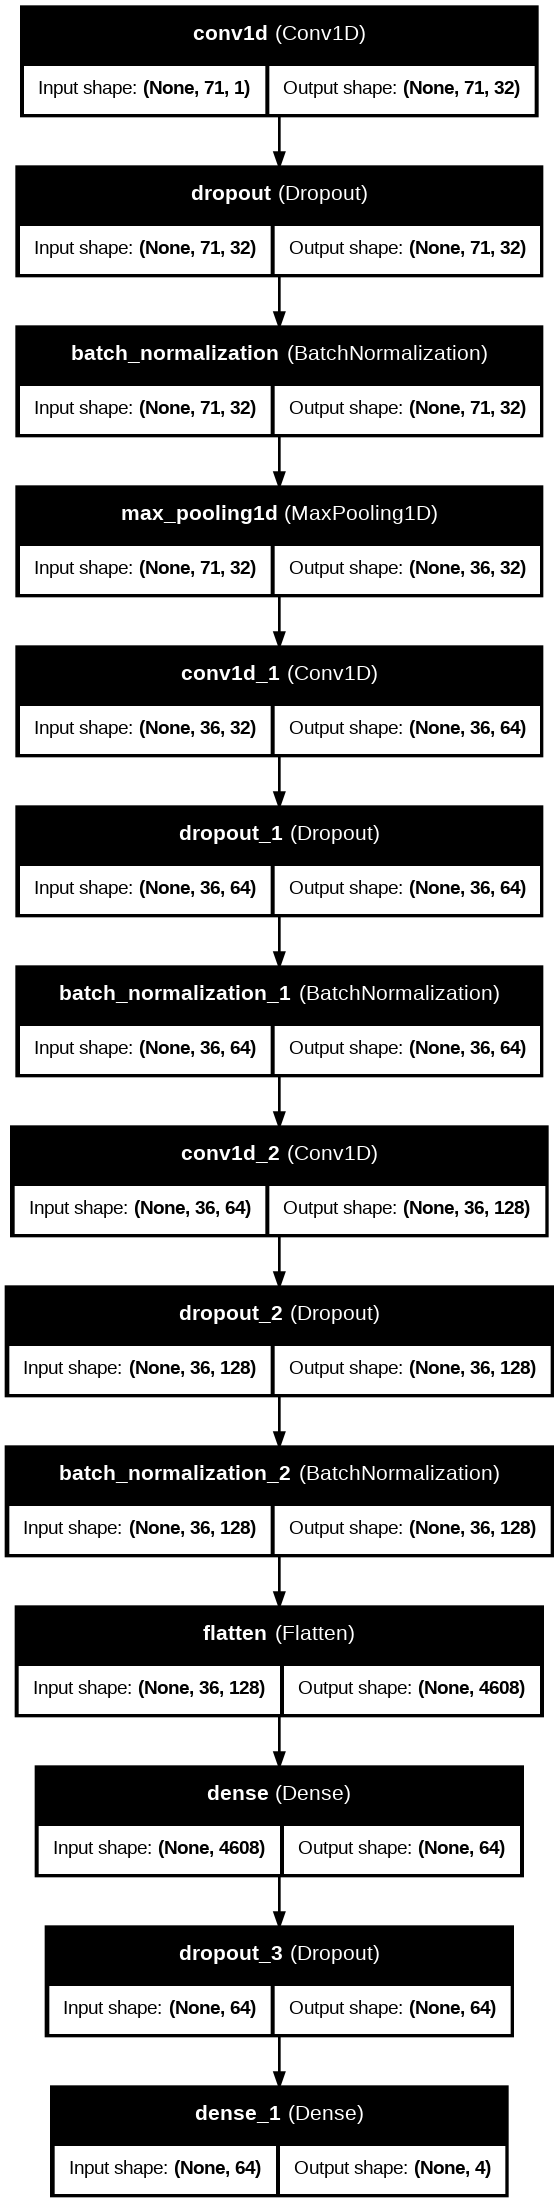

In [ ]:
plot_model(CNN_model1, to_file='CNN_model1.png', show_shapes=True, show_layer_names=True, dpi=96)

In [ ]:
CNN_model2 = CNN2(input_size2)
CNN_model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_3 (Conv1D)               │ (None, 300, 16)        │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 300, 16)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 300, 16)        │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 150, 16)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 150, 32)        │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 150, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 150, 32)        │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 75, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 75, 64)         │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 75, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 75, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4800)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       307,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 315,812 (1.20 MB)

 Trainable params: 315,588 (1.20 MB)

 Non-trainable params: 224 (896.00 B)

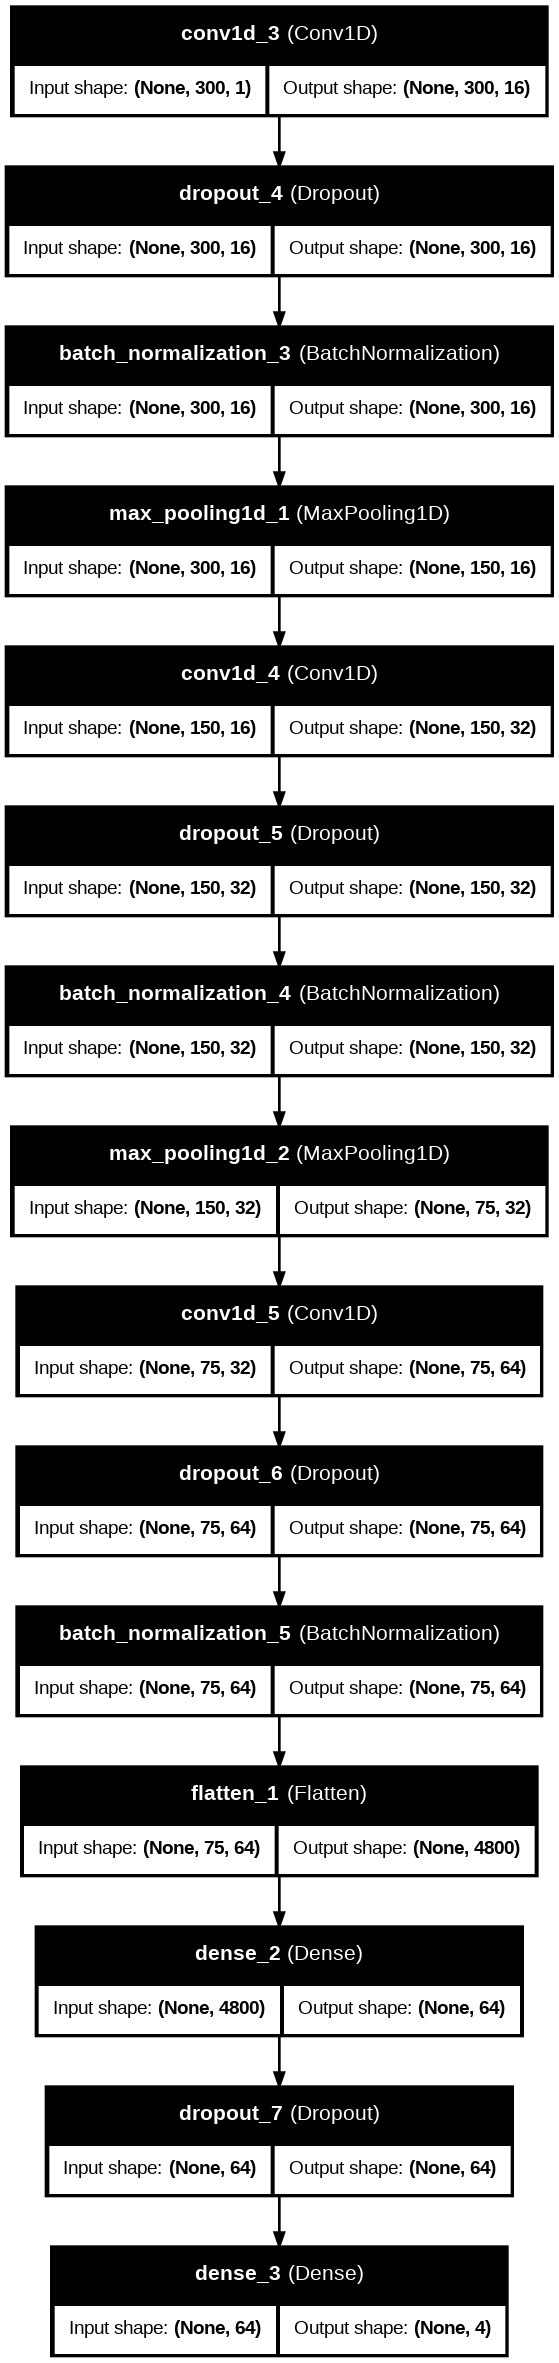

In [ ]:
plot_model(CNN_model2, to_file='CNN_model2.png', show_shapes=True, show_layer_names=True, dpi=96)

# CNN MODEL TRANNING WITH NUMERICAL FEATURES

In [ ]:
# Biên dịch mô hình với learning rate thấp hơn
CNN_model1.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy', 'Precision', 'Recall'])

# Kiểm tra dữ liệu
print("Kiểm tra NaN/Inf trong X_train1:", np.any(np.isnan(X_train1)), np.any(np.isinf(X_train1)))
print("Kiểm tra NaN/Inf trong Y_train1:", np.any(np.isnan(Y_train1)), np.any(np.isinf(Y_train1)))
print("Shape of X_train1:", X_train1.shape)  # (x, 71, 1)
print("Shape of Y_train1:", Y_train1.shape)  # (x, 4)
print("Sample of Y_train1:", Y_train1[:5])   # Kiểm tra one-hot
print("Min and Max of X_train1:", np.min(X_train1), np.max(X_train1))  # Kiểm tra phạm vi giá trị

# Kiểm tra phân bố nhãn
y_labels = np.argmax(Y_train1, axis=1)
print("Phân bố nhãn (tỷ lệ):", pd.Series(y_labels).value_counts(normalize=True))

# Định nghĩa callbacks
callbacks = [
    ModelCheckpoint('CNN_MODEL_ON_NUMERICAL_FEATURES.keras', save_best_only=True, verbose=1),
    EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=10, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-7, verbose=1)
]

# Huấn luyện mô hình
CNN_results_1 = CNN_model1.fit(X_train1, Y_train1, validation_split=0.2, batch_size=64, epochs=100, callbacks=callbacks)

# Kiểm tra đầu ra mẫu
sample_pred = CNN_model1.predict(X_train1[:10])
print("Sample predictions:", sample_pred)
if np.any(np.isnan(sample_pred)):
    print("Predictions contain NaN!")

Kiểm tra NaN/Inf trong X_train1: False False
Kiểm tra NaN/Inf trong Y_train1: False False
Shape of X_train1: (308207, 71, 1)
Shape of Y_train1: (308207, 4)
Sample of Y_train1:         benign  defacement  malware  phishing
22502      1.0         0.0      0.0       0.0
17939      0.0         0.0      1.0       0.0
143437     0.0         0.0      0.0       1.0
311233     0.0         1.0      0.0       0.0
274346     0.0         0.0      1.0       0.0
Min and Max of X_train1: -2.0 30187.0
Phân bố nhãn (tỷ lệ): 0    0.274520
1    0.245945
3    0.243505
2    0.236030
Name: proportion, dtype: float64
Epoch 1/100
3852/3853 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - Precision: 0.7960 - Recall: 0.6571 - accuracy: 0.7346 - loss: 0.8887
Epoch 1: val_loss improved from inf to 0.49348, saving model to CNN_MODEL_ON_NUMERICAL_FEATURES.keras
3853/3853 ━━━━━━━━━━━━━━━━━━━━ 171s 43ms/step - Precision: 0.7961 - Recall: 0.6571 - accuracy: 0.7346 - loss: 0.8886 - val_Precision: 0.8656 - val_Recall: 0.8142 - val_ac

In [ ]:
CNN_model1.evaluate(X_test1,Y_test1,verbose = 1)

ValueError: You must call `compile()` before using the model.

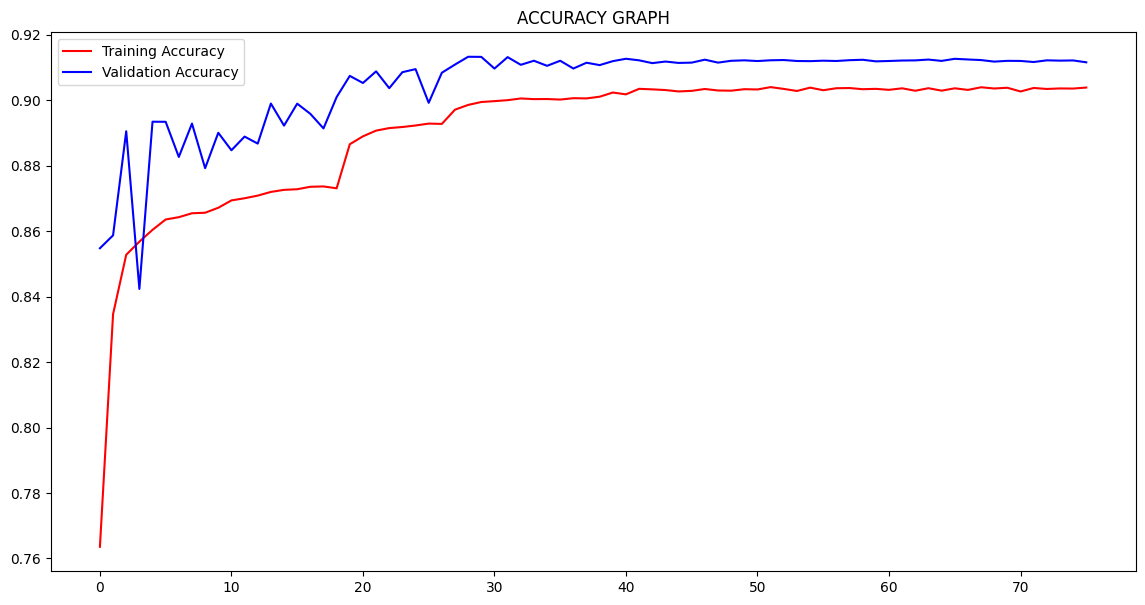

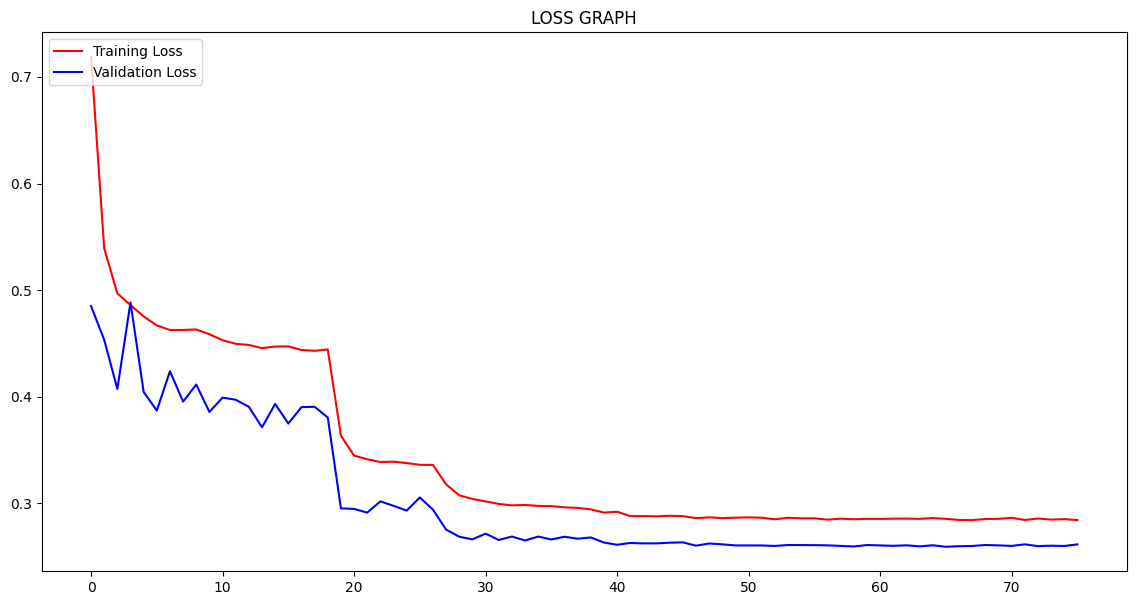

In [ ]:
eval_graph_CNN(CNN_results_1)

2516/2516 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step


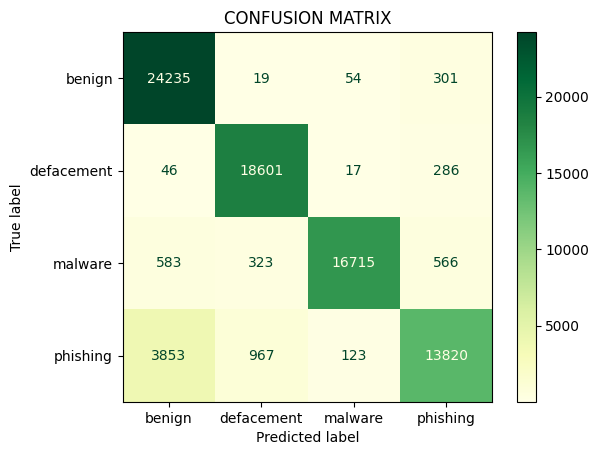

Macro F1-Score: 0.9095


In [ ]:
label_names = ['benign', 'defacement', 'malware', 'phishing']
conf_matrix_multi_label_CNN(X_test1, Y_test1, CNN_model1, label_names)

Shape of X_test inside pr_auc_multi_label: (80509, 65, 1)
Shape of X_test before model.predict: (80509, 65, 1)
Model expected input shape: (None, 65, 1)
2516/2516 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step


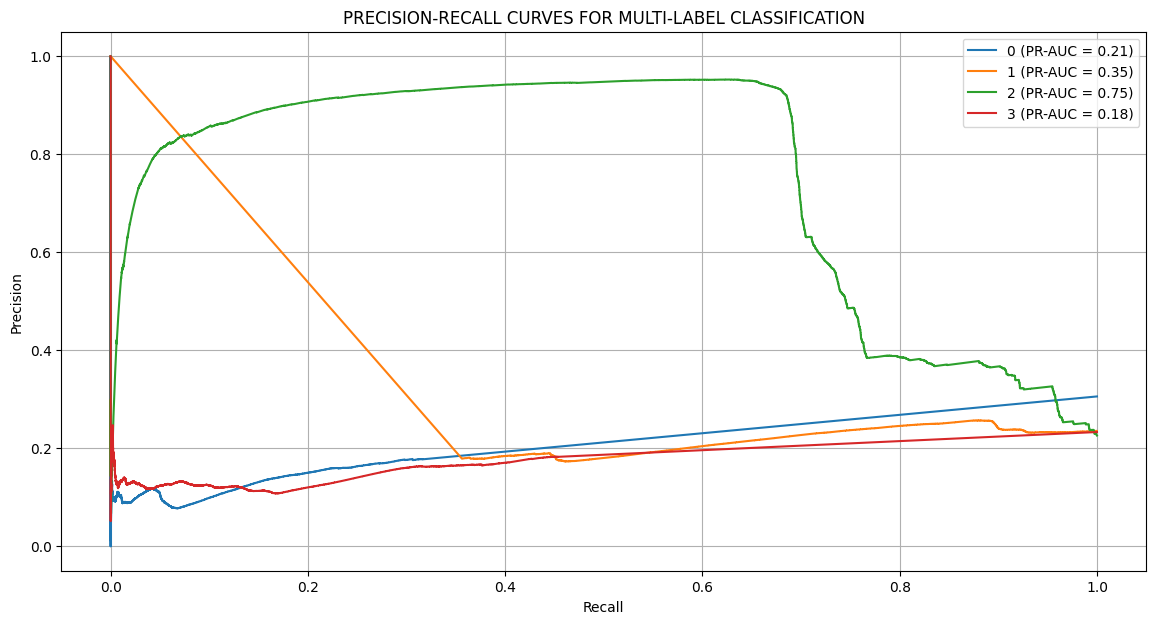

Macro PR-AUC: 0.3701


In [ ]:
pr_auc_multi_label(X_test1, Y_test1, CNN_model1, label_names)

# CNN MODEL TRANNING WITH NON-NUMERICAL FEATURES

In [ ]:
class_weights = {0: 0.9, 1: 1.0, 2: 1.1, 3: 1.05}

CNN_model2 = CNN2(input_size2)
CNN_model2.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='categorical_crossentropy',
    metrics=['accuracy', 'Precision', 'Recall']
)

# Kiểm tra phân bố nhãn
y_labels = np.argmax(Y_train2, axis=1)
print("Phân bố nhãn (tỷ lệ):", pd.Series(y_labels).value_counts(normalize=True))

# Định nghĩa callbacks
callbacks = [
    ModelCheckpoint(
        'CNN_MODEL_ON_NON_NUMERICAL_FEATURES.weights.h5',
        save_best_only=True,
        save_weights_only=True,
        verbose=1
    ),
    EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=10, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-7, verbose=1)
]

# Huấn luyện mô hình
CNN_results_2 = CNN_model2.fit(
    X_train2,
    Y_train2,
    validation_split=0.2,
    batch_size=128,
    epochs=100,
    class_weight=class_weights,
    callbacks=callbacks
)

# Kiểm tra đầu ra mẫu
sample_pred = CNN_model2.predict(X_train2[:10])
print("Sample predictions:", sample_pred)
if np.any(np.isnan(sample_pred)):
    print("Predictions contain NaN!")

Phân bố nhãn (tỷ lệ): 0    0.305667
1    0.235387
3    0.233053
2    0.225893
Name: proportion, dtype: float64
Epoch 1/100
937/938 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - Precision: 0.7452 - Recall: 0.5766 - accuracy: 0.6795 - loss: 1.4196
Epoch 1: val_loss improved from inf to 0.68694, saving model to CNN_MODEL_ON_NON_NUMERICAL_FEATURES.weights.h5
938/938 ━━━━━━━━━━━━━━━━━━━━ 92s 93ms/step - Precision: 0.7453 - Recall: 0.5767 - accuracy: 0.6796 - loss: 1.4188 - val_Precision: 0.8780 - val_Recall: 0.6304 - val_accuracy: 0.7840 - val_loss: 0.6869 - learning_rate: 5.0000e-04
Epoch 2/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - Precision: 0.8139 - Recall: 0.6903 - accuracy: 0.7652 - loss: 0.6987
Epoch 2: val_loss improved from 0.68694 to 0.63345, saving model to CNN_MODEL_ON_NON_NUMERICAL_FEATURES.weights.h5
938/938 ━━━━━━━━━━━━━━━━━━━━ 139s 91ms/step - Precision: 0.8139 - Recall: 0.6903 - accuracy: 0.7652 - loss: 0.6987 - val_Precision: 0.8286 - val_Recall: 0.7411 - val_accuracy: 0.7869 -

In [ ]:
CNN_model2.evaluate(X_test2,Y_test2,verbose = 1)

2516/2516 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - Precision: 0.8374 - Recall: 0.7930 - accuracy: 0.8169 - loss: 0.4671


[0.46411359310150146,
 0.8189022541046143,
 0.8385401368141174,
 0.7948055267333984]

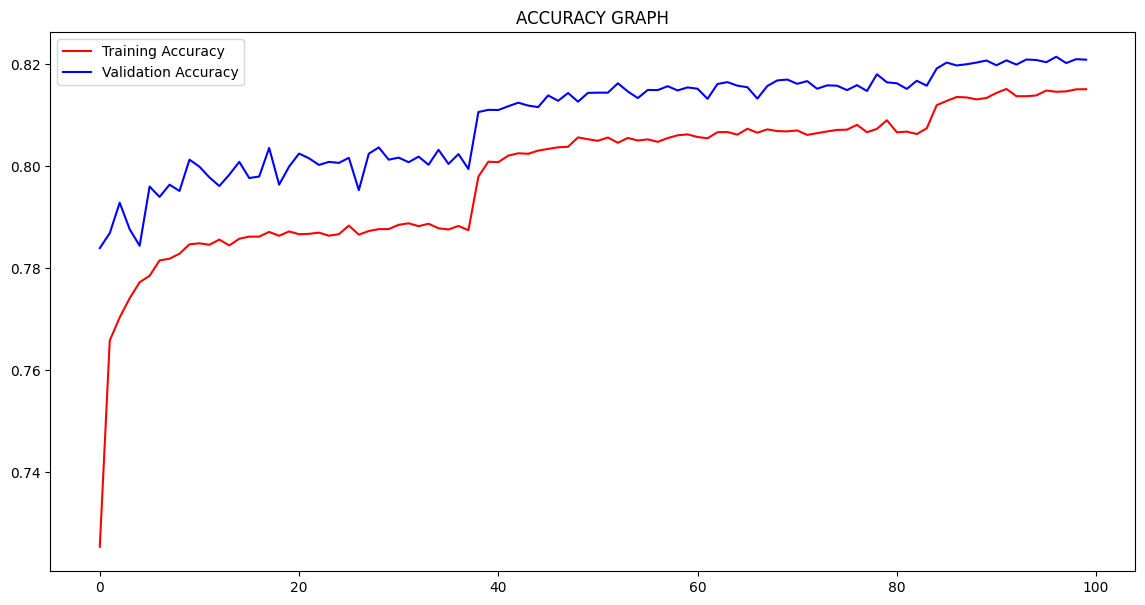

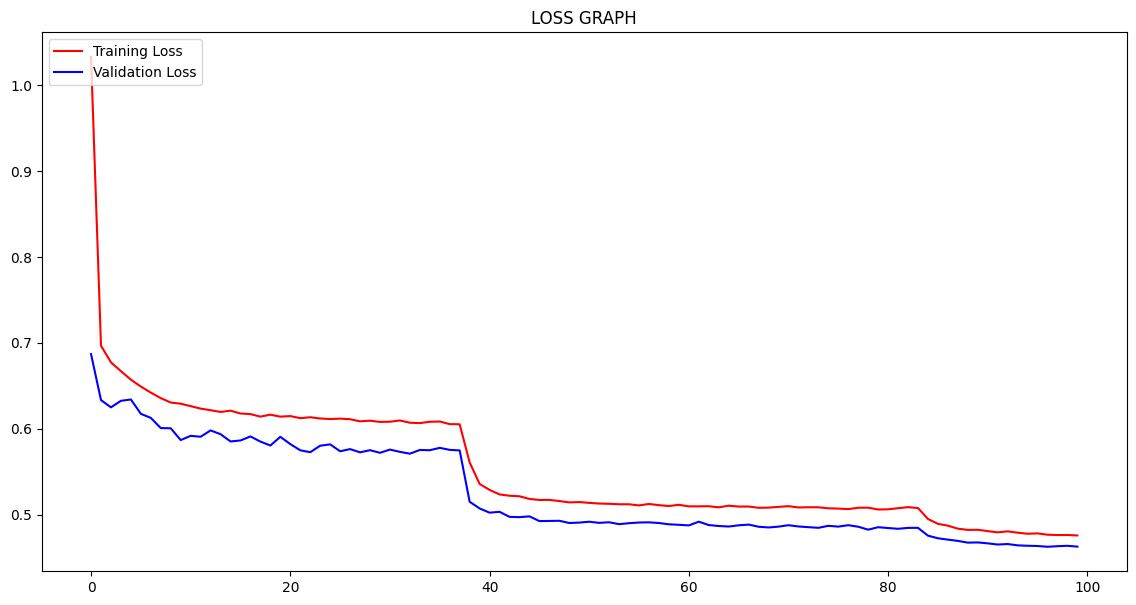

In [ ]:
eval_graph_CNN(CNN_results_2)

2516/2516 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step


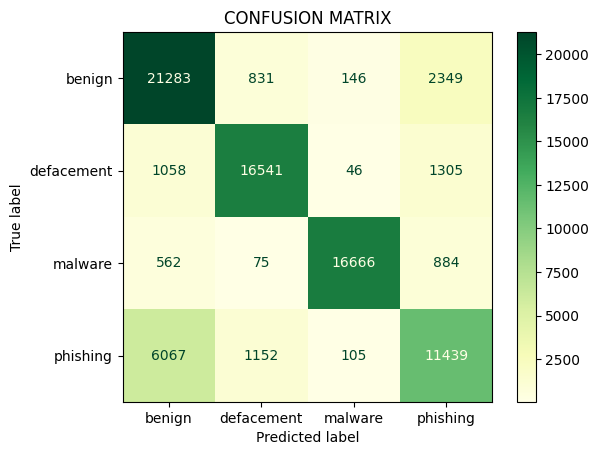

Macro F1-Score: 0.8206


In [ ]:
label_names = ['benign', 'defacement', 'malware', 'phishing']
conf_matrix_multi_label_CNN(X_test2, Y_test2, CNN_model2, label_names)

Shape of X_test inside pr_auc_multi_label: (80509, 300, 1)
Shape of X_test before model.predict: (80509, 300, 1)
Model expected input shape: (None, 300, 1)
2516/2516 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step


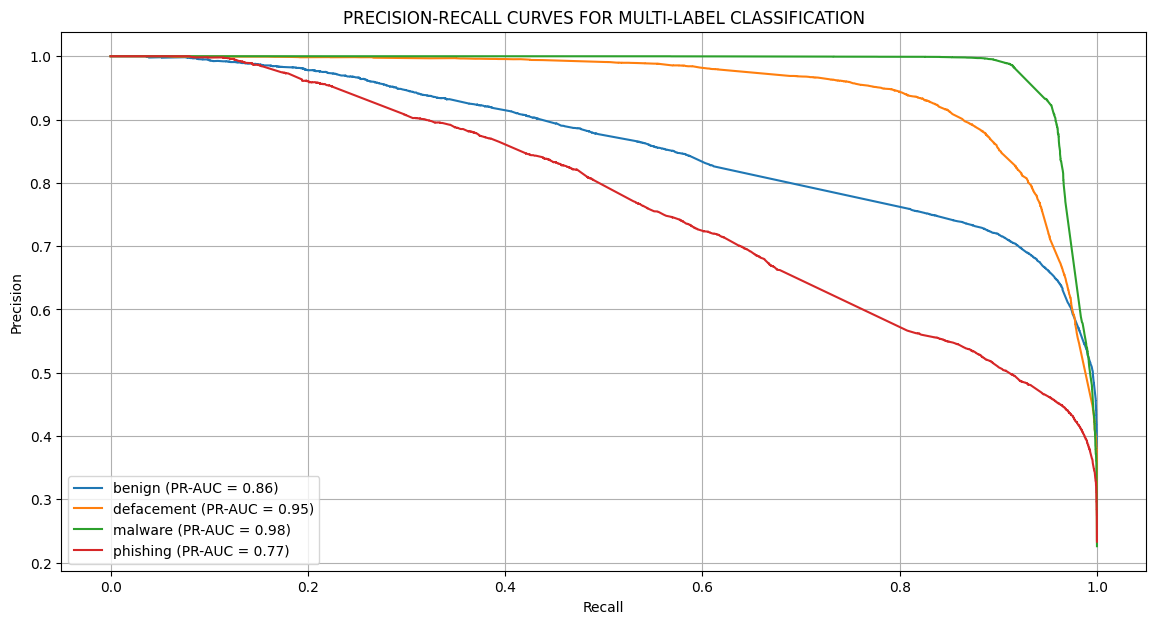

Macro PR-AUC: 0.8908


In [ ]:
pr_auc_multi_label(X_test2, Y_test2, CNN_model2, label_names)

In [ ]:
CNN_model2.save('CNN_MODEL_ON_NON_NUMERICAL_FEATURES.keras')

# XGB MODEL (Multi-Label)

In [ ]:
# Kiểm tra phân bố nhãn
print("Phân bố nhãn (tỷ lệ):", pd.Series(Y3).value_counts(normalize=True))

XGB = XGBClassifier(
    objective='multi:softmax',  # Multi-class classification
    num_class=4,                # Number of classes
    learning_rate=0.1,          # Initial learning rate
    n_estimators=100,           # Number of trees
    max_depth=6,                # Maximum depth of trees
    scale_pos_weight=[1/0.274521, 1/0.245943, 1/0.236030, 1/0.243506],  # Adjusted for class imbalance (based on proportions)
    eval_metric=['mlogloss', 'merror'],
    callbacks=[xgb.callback.EvaluationMonitor(period=1)],
    random_state=42
)

Phân bố nhãn (tỷ lệ): 0    0.305669
1    0.235384
3    0.233051
2    0.225896
Name: proportion, dtype: float64


# XGB TRANNING WITH NUMERICAL FEATURES

In [ ]:
XGB.fit(
    X_train3,
    Y_train3,
    eval_set=[(X_test3, Y_test3)],
    verbose=True,  # Enable verbose output for monitoring
)

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [06:29:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[0]	validation_0-mlogloss:1.24456	validation_0-merror:0.11262
[0]	validation_0-mlogloss:1.24456	validation_0-merror:0.11262
[1]	validation_0-mlogloss:1.12931	validation_0-merror:0.11147
[1]	validation_0-mlogloss:1.12931	validation_0-merror:0.11147
[2]	validation_0-mlogloss:1.03334	validation_0-merror:0.11103
[2]	validation_0-mlogloss:1.03334	validation_0-merror:0.11103
[3]	validation_0-mlogloss:0.95197	validation_0-merror:0.11380
[3]	validation_0-mlogloss:0.95197	validation_0-merror:0.11380
[4]	validation_0-mlogloss:0.88180	validation_0-merror:0.11402
[4]	validation_0-mlogloss:0.88180	validation_0-merror:0.11402
[5]	validation_0-mlogloss:0.81914	validation_0-merror:0.11231
[5]	validation_0-mlogloss:0.81914	validation_0-merror:0.11231
[6]	validation_0-mlogloss:0.76410	validation_0-merror:0.11040
[6]	validation_0-mlogloss:0.76410	validation_0-merror:0.11040
[7]	validation_0-mlogloss:0.71584	validation_0-merror:0.10873
[7]	validation_0-mlogloss:0.71584	validation_0-merror:0.10873
[8]	vali

XGBClassifier(base_score=None, booster=None,
              callbacks=[<xgboost.callback.EvaluationMonitor object at 0x7d8531270c90>],
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=['mlogloss', 'merror'],
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, num_class=4, ...)

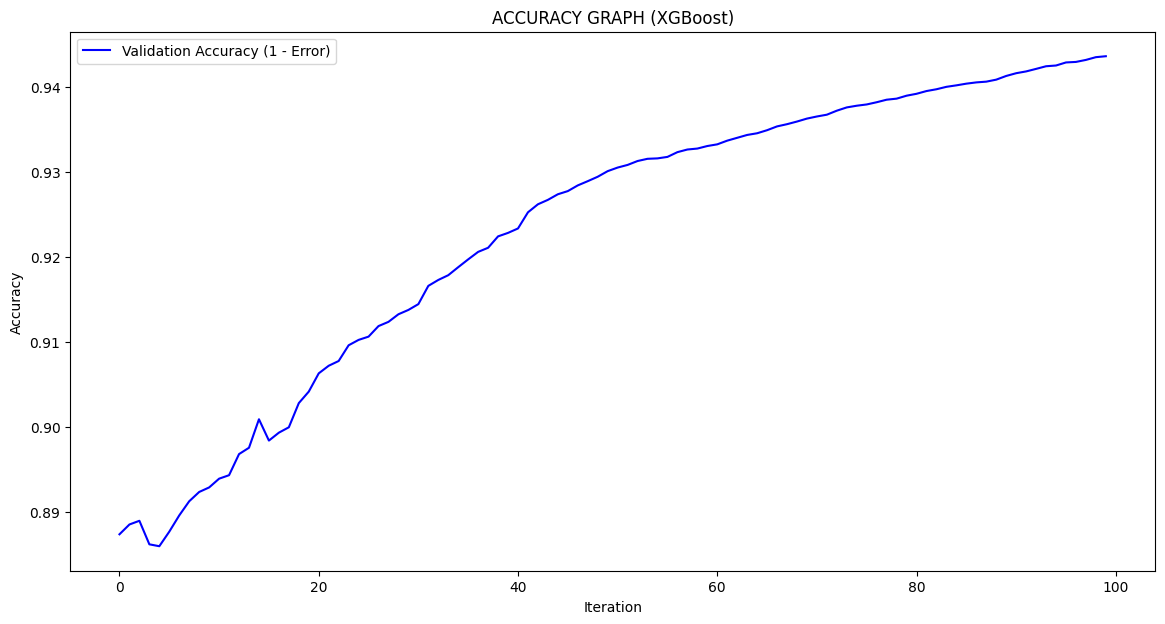

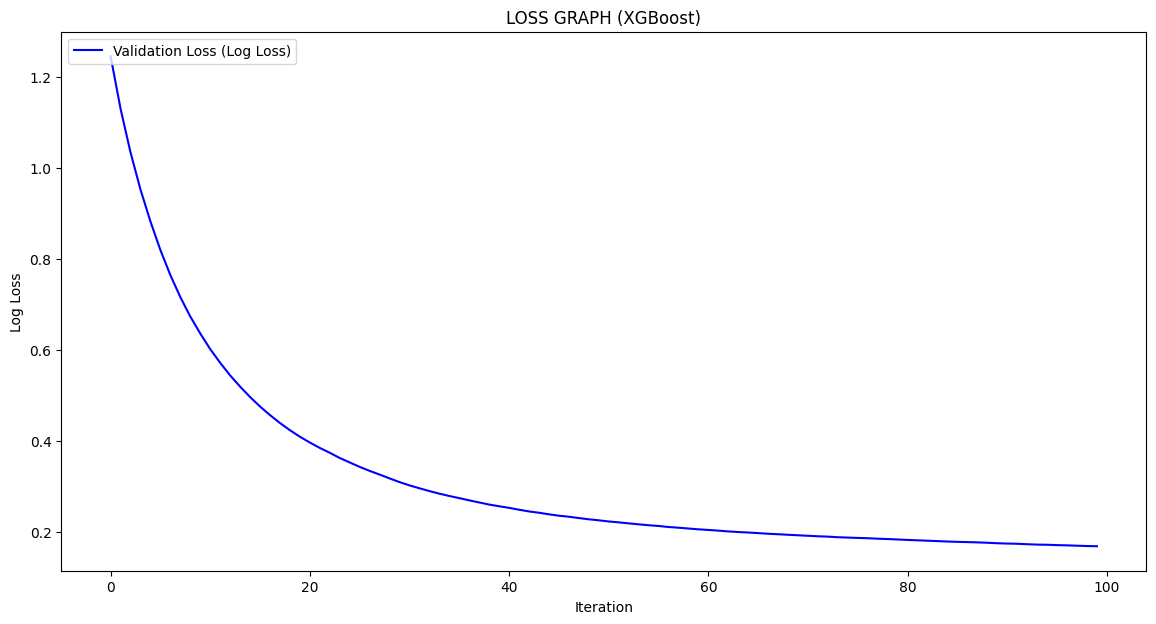

In [ ]:
results = XGB.evals_result()
eval_graph_XGB(results)

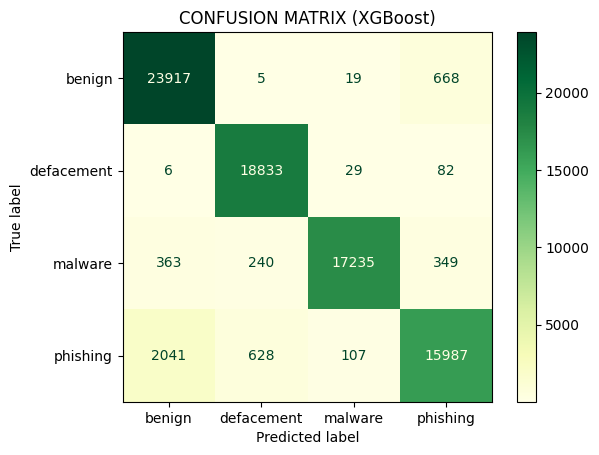

Macro F1-Score: 0.9436


In [ ]:
label_names = ['benign', 'defacement', 'malware', 'phishing']
conf_matrix_multi_label_XGB(X_test3, Y_test3, XGB, label_names)

In [ ]:
joblib.dump(XGB, 'XGB_MODEL_ON_NUMERICAL_FEATURES.pkl')

['XGB_MODEL_ON_NUMERICAL_FEATURES.pkl']

# XGB TRANNING WITH NON-NUMERICAL FEATURES

In [ ]:
XGB.fit(
    X_train4,
    Y_train4,
    eval_set=[(X_test4, Y_test4)],
    verbose=True,  # Enable verbose output for monitoring
)

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [06:30:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[0]	validation_0-mlogloss:1.31433	validation_0-merror:0.38173
[0]	validation_0-mlogloss:1.31433	validation_0-merror:0.38173
[1]	validation_0-mlogloss:1.25412	validation_0-merror:0.37659
[1]	validation_0-mlogloss:1.25412	validation_0-merror:0.37659
[2]	validation_0-mlogloss:1.20391	validation_0-merror:0.38098
[2]	validation_0-mlogloss:1.20391	validation_0-merror:0.38098
[3]	validation_0-mlogloss:1.15901	validation_0-merror:0.37089
[3]	validation_0-mlogloss:1.15901	validation_0-merror:0.37089
[4]	validation_0-mlogloss:1.11999	validation_0-merror:0.37080
[4]	validation_0-mlogloss:1.11999	validation_0-merror:0.37080
[5]	validation_0-mlogloss:1.08656	validation_0-merror:0.36311
[5]	validation_0-mlogloss:1.08656	validation_0-merror:0.36311
[6]	validation_0-mlogloss:1.05567	validation_0-merror:0.36111
[6]	validation_0-mlogloss:1.05567	validation_0-merror:0.36111
[7]	validation_0-mlogloss:1.02823	validation_0-merror:0.35810
[7]	validation_0-mlogloss:1.02823	validation_0-merror:0.35810
[8]	vali

XGBClassifier(base_score=None, booster=None,
              callbacks=[<xgboost.callback.EvaluationMonitor object at 0x7d8531270c90>],
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=['mlogloss', 'merror'],
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, num_class=4, ...)

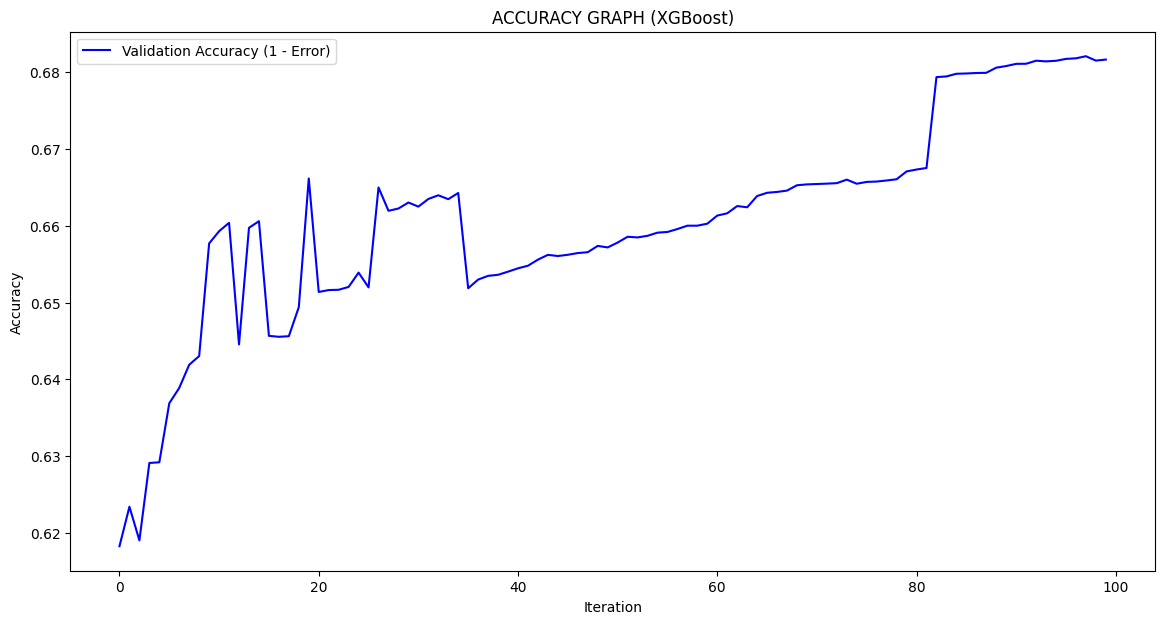

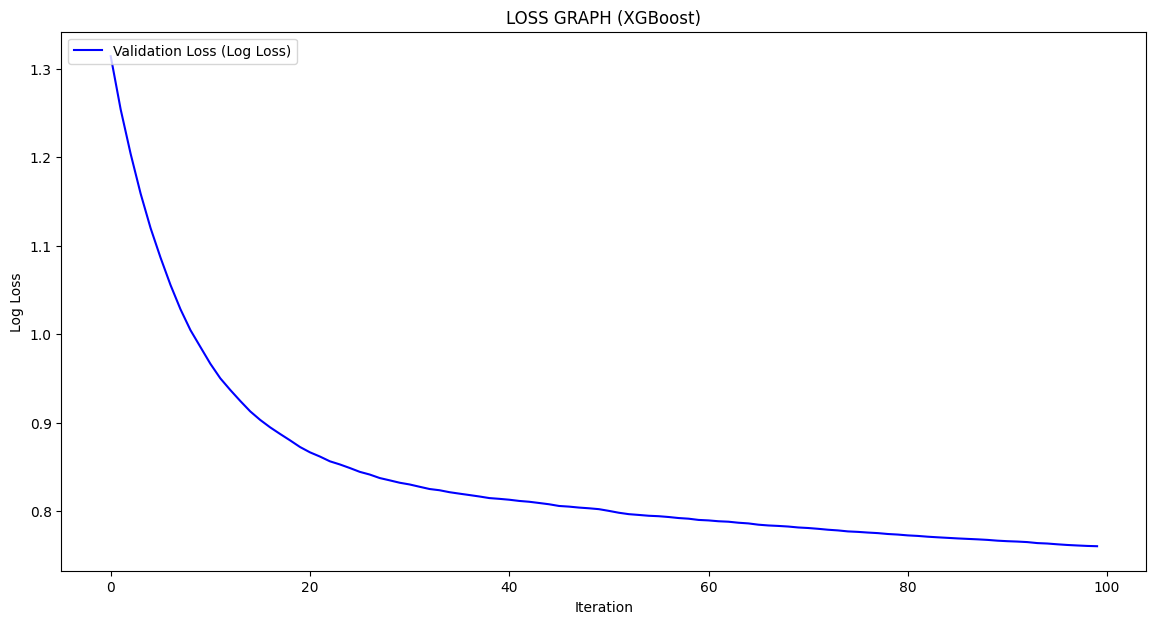

In [ ]:
results = XGB.evals_result()
eval_graph_XGB(results)

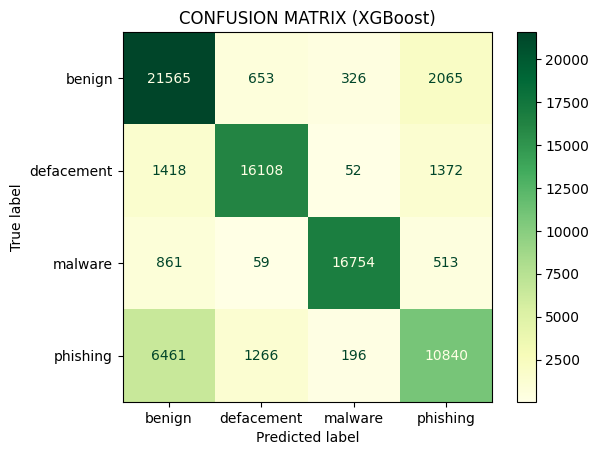

Macro F1-Score: 0.8112


In [ ]:
label_names = ['benign', 'defacement', 'malware', 'phishing']
conf_matrix_multi_label_XGB(X_test4, Y_test4, XGB, label_names)

In [ ]:
joblib.dump(XGB, 'XGB_MODEL_ON_NON_NUMERICAL_FEATURES.pkl')

['XGB_MODEL_ON_NON_NUMERICAL_FEATURES.pkl']

# RANDOM FOREST MODEL (Multi-Labels)

In [ ]:
# Kiểm tra phân bố nhãn
print("Phân bố nhãn (tỷ lệ):", pd.Series(Y3).value_counts(normalize=True))

RF = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=1,
    max_features='sqrt',
    bootstrap=True,
    n_jobs=-1,
    random_state=42
)

Phân bố nhãn (tỷ lệ): 0    0.305669
1    0.235384
3    0.233051
2    0.225896
Name: proportion, dtype: float64


# RANDOM FOREST TRAINNING WITH NUMERICAL FEATURES

In [ ]:
RF.fit(X_train3, Y_train3)

RandomForestClassifier(max_depth=15, min_samples_split=5, n_jobs=-1,
                       random_state=42)

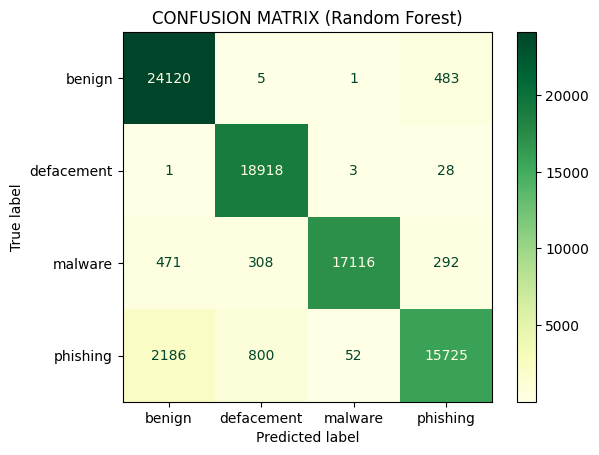

Macro F1-Score: 0.9422


In [ ]:
label_names = ['benign', 'defacement', 'malware', 'phishing']
conf_matrix_multi_label_RF(X_test3, Y_test3, RF, label_names)

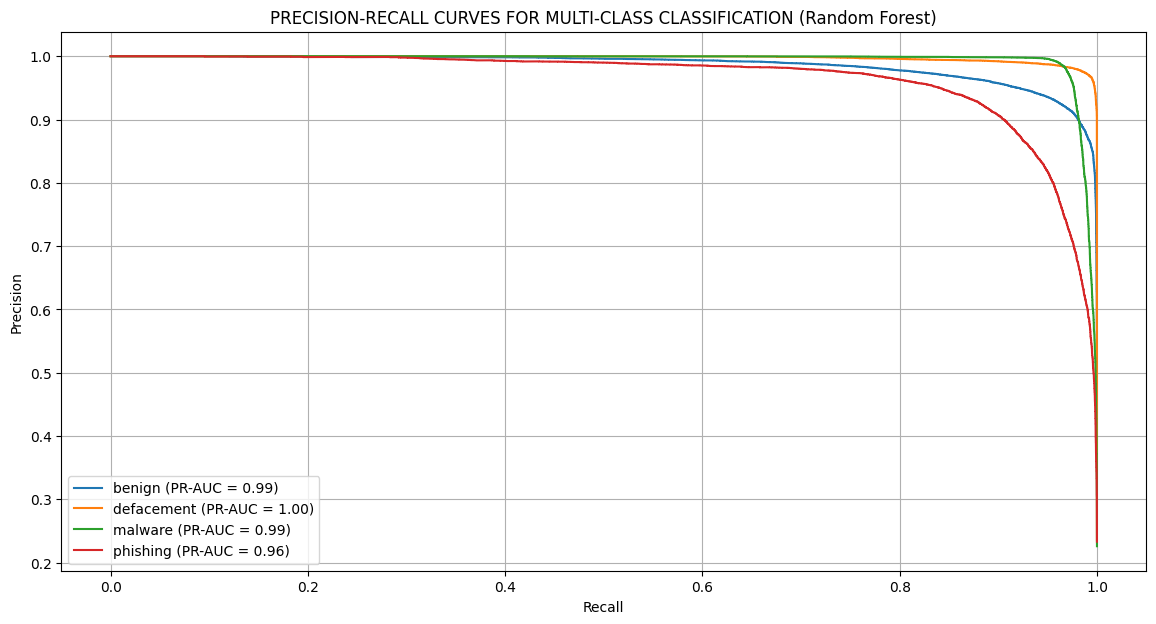

Macro PR-AUC: 0.9853


In [ ]:
pr_auc_multi_class_RF(X_test3, Y_test3, RF, label_names)

In [ ]:
joblib.dump(RF, 'RF_MODEL_ON_NUMERICAL_FEATURES.pkl')

['RF_MODEL_ON_NUMERICAL_FEATURES.pkl']

# RANDOM FOREST TRAINNING WITH NON-NUMERICAL FEATURES

In [ ]:
RF.fit(X_train4, Y_train4)

RandomForestClassifier(max_depth=15, min_samples_split=5, n_jobs=-1,
                       random_state=42)

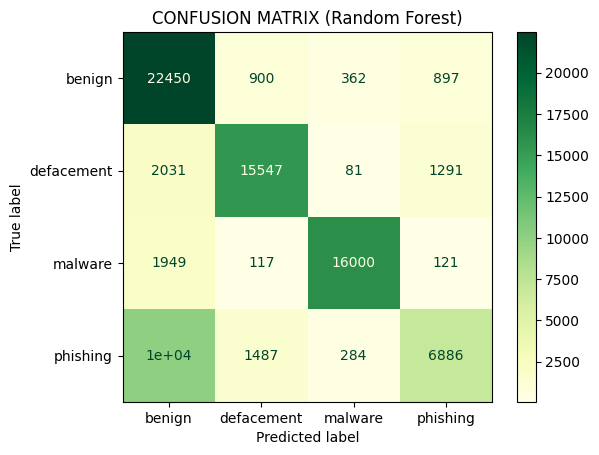

Macro F1-Score: 0.7460


In [ ]:
label_names = ['benign', 'defacement', 'malware', 'phishing']
conf_matrix_multi_label_RF(X_test4, Y_test4, RF, label_names)

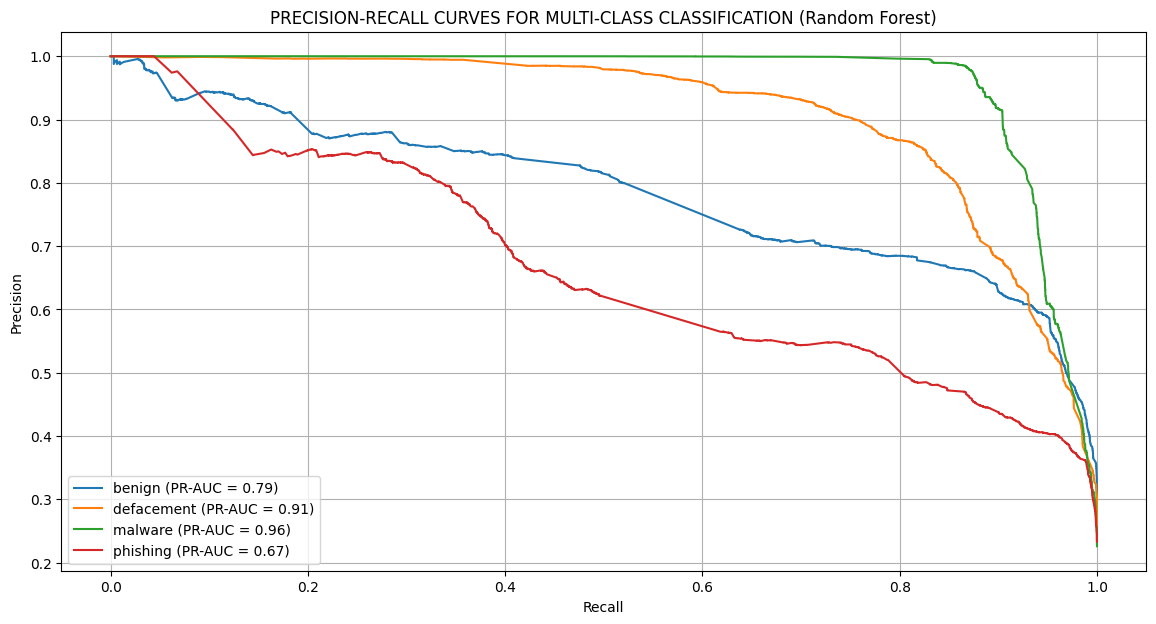

Macro PR-AUC: 0.8311


In [ ]:
pr_auc_multi_class_RF(X_test4, Y_test4, RF, label_names)

In [ ]:
joblib.dump(RF, 'RF_MODEL_ON_NON_NUMERICAL_FEATURES.pkl')

['RF_MODEL_ON_NON_NUMERICAL_FEATURES.pkl']